In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
nfl = pd.read_csv('NFL_thru_week_18_with_FE2.csv')

In [3]:
nfl.head()

,Unnamed: 0,Week,Year,GID,Name,Pos,Team,h/a,Oppt,FD points,...,Home Dummy,Last Points,Last Salary,Salary MA3,Lagged Points MA3,Salary CMA,Lagged Points CMA,Lagged Oppt Points,Lagged Oppt Points CMA,Lagged Oppt Points MA3
0,0,1,2021,1537,"Murray, Kyler",QB,ari,a,ten,34.56,...,0,NaN,NaN,NaN,NaN,8400.0,NaN,NaN,NaN,NaN
1,1,1,2021,1523,"Mahomes II, Patrick",QB,kan,h,cle,33.28,...,1,NaN,NaN,NaN,NaN,8800.0,NaN,NaN,NaN,NaN
2,2,1,2021,1490,"Goff, Jared",QB,det,h,sfo,29.92,...,1,NaN,NaN,NaN,NaN,6500.0,NaN,NaN,NaN,NaN
3,3,1,2021,1465,"Winston, Jameis",QB,nor,h,gnb,29.62,...,1,NaN,NaN,NaN,NaN,6700.0,NaN,NaN,NaN,NaN
4,4,1,2021,1530,"Hill, Taysom",QB,nor,h,gnb,0.22,...,1,NaN,NaN,NaN,NaN,6700.0,NaN,NaN,NaN,NaN


In [4]:
### Going to need a new variable for Position ranks, i.e. WR1, WR2, RB1, RB2
nfl['Pos2'] = nfl['Pos']

In [68]:
### Now, how to determine position ranks?
ranks = nfl.sort_values('FD salary').groupby(['Week','Team','Pos'])['FD salary'].rank("min", ascending=False)

ranks

ranksdf = pd.DataFrame(ranks).reset_index()

ranksdf.rename(columns={'FD salary':'Rank'}, inplace=True)

ranksdf

ranksdf['Rank'] = [str(x)[0] for x in ranksdf.Rank]

ranksdf

,index,Rank
0,2194,1
1,7451,1
2,419,1
3,3339,1
4,1299,1
...,...,...
7474,1000,1
7475,2233,1
7476,4984,1
7477,3079,1


In [11]:
nfl.shape

(7479, 22)

In [69]:
del nfl['Rank']

In [70]:
nfl.head()
nfl.tail()

,index,Week,Year,GID,Name,Pos,Team,h/a,Oppt,FD points,...,Last Salary,Salary MA3,Lagged Points MA3,Salary CMA,Lagged Points CMA,Lagged Oppt Points,Lagged Oppt Points CMA,Lagged Oppt Points MA3,Pos2,rank
7474,7474,18,2021,7002,Atlanta,Def,atl,h,nor,0.0,...,3000.0,3366.666667,4.000000,3511.764706,4.0625,3.0,6.8750,11.333333,Def1,1.0
7475,7475,18,2021,7026,LA Chargers,Def,lac,a,oak,-1.0,...,4000.0,4333.333333,4.666667,3852.941176,4.9375,6.0,7.4375,7.333333,Def1,1.0
7476,7476,18,2021,7023,Philadelphia,Def,phi,h,dal,-3.0,...,4300.0,4333.333333,8.333333,3923.529412,7.1250,3.0,4.3125,2.333333,Def1,1.0
7477,7477,18,2021,7005,Carolina,Def,car,a,tam,-3.0,...,3600.0,3433.333333,2.333333,4029.411765,5.7500,2.0,3.8125,6.333333,Def1,1.0
7478,7478,18,2021,7012,Green Bay,Def,gnb,a,det,-3.0,...,4700.0,4566.666667,6.333333,4152.941176,7.5625,5.0,7.2500,3.666667,Def1,1.0


In [52]:
nfl.rename(columns={'Unnamed: 0':'index'}, inplace=True)


In [72]:
nfl = nfl.merge(ranksdf, on='index')

In [74]:
nfl.loc[nfl.Team.eq('den') & nfl.Week.eq(4) , ['Name','Pos','Team','FD salary','Rank'] ]

,Name,Pos,Team,FD salary,Rank
1355,"Bridgewater, Teddy",QB,den,6800.0,1
1356,"Lock, Drew",QB,den,6200.0,2
1456,"Gordon, Melvin",RB,den,6200.0,1
1457,"Williams, Javonte",RB,den,5900.0,2
1458,"Crockett, Damarea",RB,den,4500.0,3
1626,"Sutton, Courtland",WR,den,6300.0,1
1627,"Patrick, Tim",WR,den,6100.0,2
1628,"Hinton, Kendall",WR,den,6000.0,3
1629,"Moore, David",WR,den,4500.0,4
1630,"Spencer, Diontae",WR,den,4500.0,4


In [75]:
nfl['Pos2'] = nfl['Pos'] + nfl['Rank']

In [76]:
nfl['Pos2'].value_counts()

WR4     595
RB1     567
WR2     561
WR3     561
TE2     557
TE1     556
QB1     555
WR1     548
Def1    544
RB2     541
RB3     527
WR5     407
TE3     389
RB4     247
QB2     136
WR6      83
TE4      79
RB5      21
WR7       2
TE5       2
RB6       1
Name: Pos2, dtype: int64

In [78]:
nfl['Pos2'] = nfl['Pos2'].replace('Def1','Def')

In [79]:
nfl['Pos2'].value_counts()

WR4    595
RB1    567
WR2    561
WR3    561
TE2    557
TE1    556
QB1    555
WR1    548
Def    544
RB2    541
RB3    527
WR5    407
TE3    389
RB4    247
QB2    136
WR6     83
TE4     79
RB5     21
WR7      2
TE5      2
RB6      1
Name: Pos2, dtype: int64

In [ ]:
### Now the correlations?
nfl.sort_values('Week').groupby()  ### ???

In [83]:
nfl.tail()
nfl.GID.value_counts()
nfl.loc[nfl.GID.eq(5911),]

,index,Week,Year,GID,Name,Pos,Team,h/a,Oppt,FD points,...,Salary MA3,Lagged Points MA3,Salary CMA,Lagged Points CMA,Lagged Oppt Points,Lagged Oppt Points CMA,Lagged Oppt Points MA3,Pos2,rank,Rank
42,42,1,2021,5911,"Hubbard, Chuba",RB,car,h,nyj,1.4,...,NaN,NaN,4700.000000,NaN,NaN,NaN,NaN,RB2,2.0,2
486,486,2,2021,5911,"Hubbard, Chuba",RB,car,h,nor,1.0,...,NaN,NaN,4650.000000,1.400000,7.7,7.700000,NaN,RB2,2.0,2
999,999,3,2021,5911,"Hubbard, Chuba",RB,car,a,hou,9.4,...,4666.666667,NaN,4666.666667,1.200000,40.2,26.950000,NaN,RB2,2.0,2
1449,1449,4,2021,5911,"Hubbard, Chuba",RB,car,a,dal,8.1,...,5200.000000,3.933333,5075.000000,3.933333,13.4,15.033333,15.033333,RB1,1.0,1
1857,1857,5,2021,5911,"Hubbard, Chuba",RB,car,h,phi,15.9,...,5900.000000,6.166667,5400.000000,4.975000,31.7,25.600000,27.133333,RB1,1.0,1
2289,2289,6,2021,5911,"Hubbard, Chuba",RB,car,h,min,13.0,...,6633.333333,11.133333,5650.000000,7.160000,26.9,23.800000,26.666667,RB1,1.0,1
2693,2693,7,2021,5911,"Hubbard, Chuba",RB,car,a,nyg,7.6,...,6966.666667,12.333333,5885.714286,8.133333,27.9,26.300000,28.533333,RB1,1.0,1
3034,3034,8,2021,5911,"Hubbard, Chuba",RB,car,a,atl,13.6,...,6933.333333,12.166667,5975.000000,8.057143,23.3,23.500000,26.233333,RB1,1.0,1
3440,3440,9,2021,5911,"Hubbard, Chuba",RB,car,h,nwe,4.1,...,6900.000000,11.400000,6066.666667,8.750000,30.4,21.150000,25.366667,RB2,2.0,2
3790,3790,10,2021,5911,"Hubbard, Chuba",RB,car,a,ari,8.7,...,6533.333333,8.433333,6080.000000,8.233333,15.6,17.300000,18.866667,RB2,2.0,2


In [87]:
nfl['TeamWeek'] = nfl['Team']+[ str(x) for x in nfl['Week']]

nfl.TeamWeek.value_counts()

kan14    17
kan11    17
kan10    17
kan17    17
nyg6     16
         ..
phi6     11
det1     11
det8     11
det5     11
det4     11
Name: TeamWeek, Length: 544, dtype: int64

In [89]:
pivot = pd.pivot_table(nfl, values='FD points', index='TeamWeek', columns='Pos2' )

pivot

Pos2,Def,QB1,QB2,RB1,RB2,RB3,RB4,RB5,RB6,TE1,...,TE3,TE4,TE5,WR1,WR2,WR3,WR4,WR5,WR6,WR7
TeamWeek,,,,,,,,,,,,,,,,,,,,,
ari1,16.0,34.56,NaN,12.6,5.3,0.0,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,23.3,3.5,21.5,8.80,NaN,NaN,NaN
ari10,3.0,1.18,1.84,13.9,2.2,NaN,NaN,NaN,NaN,6.6,...,NaN,NaN,NaN,9.3,0.9,2.1,0.00,0.0,NaN,NaN
ari11,8.0,22.92,NaN,18.4,2.5,NaN,NaN,NaN,NaN,24.8,...,NaN,NaN,NaN,3.5,9.8,10.6,6.40,0.0,NaN,NaN
ari13,11.0,30.82,NaN,18.1,1.8,NaN,NaN,NaN,NaN,1.5,...,1.7,NaN,NaN,10.2,0.9,1.9,1.50,0.0,NaN,NaN
ari14,2.0,19.42,NaN,29.0,0.0,0.0,NaN,NaN,NaN,6.7,...,0.0,NaN,NaN,7.9,10.1,13.7,3.10,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
was4,6.0,27.90,NaN,14.5,14.4,1.7,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,27.3,3.9,2.4,2.40,0.0,8.9,NaN
was5,5.0,11.92,NaN,20.2,1.2,1.3,NaN,NaN,NaN,6.6,...,NaN,NaN,NaN,6.6,0.8,8.8,0.00,5.2,NaN,NaN
was6,8.0,10.28,NaN,3.4,15.0,0.8,NaN,NaN,NaN,13.8,...,NaN,NaN,NaN,4.8,0.1,0.0,2.25,NaN,0.0,NaN


In [97]:
pivot.columns
corrdf = pivot.drop(columns=['QB2','RB3','RB4','RB5','RB6','TE3','TE4','TE5','WR5','WR6','WR7']).corr()
corrdf
#pivot.corr()

Pos2,Def,QB1,RB1,RB2,TE1,TE2,WR1,WR2,WR3,WR4
Pos2,,,,,,,,,,
Def,1.000000,-0.011900,0.073048,0.083146,-0.061724,-0.051222,0.049483,-0.020516,-0.076695,-0.046345
QB1,-0.011900,1.000000,0.156085,-0.005090,0.290118,0.088521,0.398652,0.304585,0.331606,0.181089
RB1,0.073048,0.156085,1.000000,-0.118080,-0.058875,0.113989,-0.000667,0.081549,0.019176,-0.026821
RB2,0.083146,-0.005090,-0.118080,1.000000,0.015294,0.042753,-0.066119,-0.101473,-0.024779,0.015786
TE1,-0.061724,0.290118,-0.058875,0.015294,1.000000,-0.079059,-0.027625,0.009577,0.006971,0.015395
TE2,-0.051222,0.088521,0.113989,0.042753,-0.079059,1.000000,-0.021044,-0.038260,-0.044569,-0.090732
WR1,0.049483,0.398652,-0.000667,-0.066119,-0.027625,-0.021044,1.000000,0.027961,0.041899,-0.019513
WR2,-0.020516,0.304585,0.081549,-0.101473,0.009577,-0.038260,0.027961,1.000000,0.064492,-0.056489
WR3,-0.076695,0.331606,0.019176,-0.024779,0.006971,-0.044569,0.041899,0.064492,1.000000,0.016006


Text(0.5, 1.0, 'Fantasy Scoring Correlations by Position Rank')

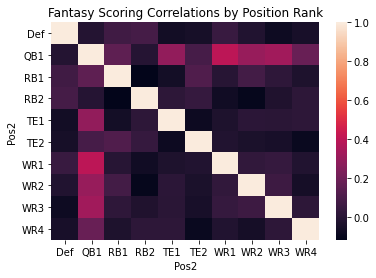

In [99]:
sns.heatmap(corrdf).set_title("Fantasy Scoring Correlations by Position Rank")

In [103]:
### Optimal lineup based on predictions??
from pulp import *

def best_lineup(names, positions, salaries, projections):
    
    nplayers = len(names)
    
    prob = pulp.LpProblem("NFL")
    
    lineup = [pulp.LpVariable("Player_{}".format(i), cat='Binary') for i in range(nplayers) ]
    
    # Minimize the negative of the sum of projections of the 9-man roster
    prob += pulp.lpSum( -1 * projections[i] * lineup[i] for i in range(nplayers) )
    
    # Nine Total Players in the Lineup:
    prob += (pulp.lpSum(lineup[i] for i in range(nplayers)) == 9  ) , "Nine Players per Roster"

    QB_indexes   = []
    RB_indexes   = []
    WR_indexes   = []
    TE_indexes   = []
    DST_indexes  = []
    
    for i,item in enumerate(positions):
        if item == "QB":
            QB_indexes += [i]
        elif item =="RB":
            RB_indexes += [i]
        elif item == "WR":
            WR_indexes += [i]
        elif item == "TE":
            TE_indexes += [i]
        elif item == "Def":
            DST_indexes += [i]
        else:
            print("Found position: " + item )
    
    prob += (pulp.lpSum( lineup[i] for i in QB_indexes ) == 1) , 'QB Constraint'

    prob += (pulp.lpSum( lineup[i] for i in DST_indexes ) == 1) , 'D Constraint'

    prob += (  pulp.lpSum( lineup[i] for i in RB_indexes ) >= 2) , 'RB Constraint min'
    prob += (  pulp.lpSum( lineup[i] for i in RB_indexes ) <= 3) , 'RB Constraint max'

    prob += (  pulp.lpSum( lineup[i] for i in WR_indexes ) >= 3) , 'WR Constraint min'
    prob += (  pulp.lpSum( lineup[i] for i in WR_indexes ) <= 4) , 'WR Constraint max'

    prob += (  pulp.lpSum( lineup[i] for i in TE_indexes ) >= 1) , 'TE Constraint min'
    prob += (  pulp.lpSum( lineup[i] for i in TE_indexes ) <= 2) , 'TE Constraint max'

    ### Stay under the salary cap:
    prob += (  pulp.lpSum( [lineup[i] * salaries[i] for i in range(nplayers)] ) <= 60000.0 ) , 'Salary Constraint'
    
    prob.solve()
    
    my_indices = []

    for variable in prob.variables():
        if variable.varValue == 1:
            #print( variable.name)
            my_indices.append( int( str.split( variable.name , "_")[1] ) )
    
    print(my_indices)
    
    best_names       = [names[x] for x in my_indices]
    best_positions   = [positions[x] for x in my_indices]
    best_salaries    = [salaries[x] for x in my_indices]
    best_projections = [projections[x] for x in my_indices]
        
    df = pd.DataFrame({'names':best_names, 'position':best_positions,
                       'salary':best_salaries, 'projection':best_projections  })
    
    print(df)
    
    return( best_names )

In [101]:
nfl.head()

,index,Week,Year,GID,Name,Pos,Team,h/a,Oppt,FD points,...,Lagged Points MA3,Salary CMA,Lagged Points CMA,Lagged Oppt Points,Lagged Oppt Points CMA,Lagged Oppt Points MA3,Pos2,rank,Rank,TeamWeek
0,0,1,2021,1537,"Murray, Kyler",QB,ari,a,ten,34.56,...,NaN,8400.0,NaN,NaN,NaN,NaN,QB1,1.0,1,ari1
1,1,1,2021,1523,"Mahomes II, Patrick",QB,kan,h,cle,33.28,...,NaN,8800.0,NaN,NaN,NaN,NaN,QB1,1.0,1,kan1
2,2,1,2021,1490,"Goff, Jared",QB,det,h,sfo,29.92,...,NaN,6500.0,NaN,NaN,NaN,NaN,QB1,1.0,1,det1
3,3,1,2021,1465,"Winston, Jameis",QB,nor,h,gnb,29.62,...,NaN,6700.0,NaN,NaN,NaN,NaN,QB1,1.0,1,nor1
4,4,1,2021,1530,"Hill, Taysom",QB,nor,h,gnb,0.22,...,NaN,6700.0,NaN,NaN,NaN,NaN,QB1,1.0,1,nor1


In [102]:
nfl.Pos.value_counts()

WR     2757
RB     1904
TE     1583
QB      691
Def     544
Name: Pos, dtype: int64

In [104]:
week1 = nfl.loc[nfl.Week.eq(1) , ]

In [105]:
names = list(week1.Name)
positions = list(week1.Pos)
salaries = list(week1['FD salary'])
projections = list(week1['FD points'])

#best_lineup(testDF.Name, testDF.Pos, testDF['FD salary'], testDF['FD pred'])
lu = best_lineup(names, positions, salaries, projections)

[0, 155, 159, 164, 168, 313, 405, 44, 52]
              names position  salary  projection
0     Murray, Kyler       QB  8400.0       34.56
1     Cooper, Amari       WR  6600.0       32.40
2      Hill, Tyreek       WR  8500.0       31.60
3     Samuel, Deebo       WR  6300.0       27.40
4     Thielen, Adam       WR  7300.0       25.70
5   Gronkowski, Rob       TE  5200.0       25.00
6           Arizona      Def  3400.0       16.00
7        Mixon, Joe       RB  7200.0       23.00
8  Williams, Jamaal       RB  4900.0       21.00


In [106]:
lu

['Murray, Kyler',
 'Cooper, Amari',
 'Hill, Tyreek',
 'Samuel, Deebo',
 'Thielen, Adam',
 'Gronkowski, Rob',
 'Arizona',
 'Mixon, Joe',
 'Williams, Jamaal']

In [109]:
print( week1.loc[week1.Name.isin(lu),'Team'].nunique() )

week1.loc[week1.Name.isin(lu),]



8


,index,Week,Year,GID,Name,Pos,Team,h/a,Oppt,FD points,...,Lagged Points MA3,Salary CMA,Lagged Points CMA,Lagged Oppt Points,Lagged Oppt Points CMA,Lagged Oppt Points MA3,Pos2,rank,Rank,TeamWeek
0,0,1,2021,1537,"Murray, Kyler",QB,ari,a,ten,34.56,...,NaN,8400.0,NaN,NaN,NaN,NaN,QB1,1.0,1,ari1
44,44,1,2021,5535,"Mixon, Joe",RB,cin,h,min,23.00,...,NaN,7200.0,NaN,NaN,NaN,NaN,RB1,1.0,1,cin1
52,52,1,2021,5541,"Williams, Jamaal",RB,det,h,sfo,21.00,...,NaN,4900.0,NaN,NaN,NaN,NaN,RB2,2.0,2,det1
155,155,1,2021,5376,"Cooper, Amari",WR,dal,a,tam,32.40,...,NaN,6600.0,NaN,NaN,NaN,NaN,WR1,1.0,1,dal1
159,159,1,2021,5485,"Hill, Tyreek",WR,kan,h,cle,31.60,...,NaN,8500.0,NaN,NaN,NaN,NaN,WR1,1.0,1,kan1
164,164,1,2021,5726,"Samuel, Deebo",WR,sfo,a,det,27.40,...,NaN,6300.0,NaN,NaN,NaN,NaN,WR2,2.0,2,sfo1
168,168,1,2021,5333,"Thielen, Adam",WR,min,a,cin,25.70,...,NaN,7300.0,NaN,NaN,NaN,NaN,WR2,2.0,2,min1
313,313,1,2021,4494,"Gronkowski, Rob",TE,tam,h,dal,25.00,...,NaN,5200.0,NaN,NaN,NaN,NaN,TE1,1.0,1,tam1
405,405,1,2021,7001,Arizona,Def,ari,a,ten,16.00,...,NaN,3400.0,NaN,NaN,NaN,NaN,Def,1.0,1,ari1


In [110]:
def TeamsPerWeek(weeknumber):
    temp = nfl.loc[nfl.Week==weeknumber,]
    
    names = list(temp.Name)
    positions = list(temp.Pos)
    salaries = list(temp['FD salary'])
    projections = list(temp['FD points'])

    lu = best_lineup(names, positions, salaries, projections)
    
    return( temp.loc[temp.Name.isin(lu),'Team'].nunique() )
    

In [111]:
TeamsPerWeek(1)

[0, 155, 159, 164, 168, 313, 405, 44, 52]
              names position  salary  projection
0     Murray, Kyler       QB  8400.0       34.56
1     Cooper, Amari       WR  6600.0       32.40
2      Hill, Tyreek       WR  8500.0       31.60
3     Samuel, Deebo       WR  6300.0       27.40
4     Thielen, Adam       WR  7300.0       25.70
5   Gronkowski, Rob       TE  5200.0       25.00
6           Arizona      Def  3400.0       16.00
7        Mixon, Joe       RB  7200.0       23.00
8  Williams, Jamaal       RB  4900.0       21.00


8

In [114]:
tpw = []
for i in range(1,18):
    k = TeamsPerWeek(i)
    print("week:", i, " Teams in Optimal Lineup:", k )
    tpw.append(k)
    

[0, 155, 159, 164, 168, 313, 405, 44, 52]
              names position  salary  projection
0     Murray, Kyler       QB  8400.0       34.56
1     Cooper, Amari       WR  6600.0       32.40
2      Hill, Tyreek       WR  8500.0       31.60
3     Samuel, Deebo       WR  6300.0       27.40
4     Thielen, Adam       WR  7300.0       25.70
5   Gronkowski, Rob       TE  5200.0       25.00
6           Arizona      Def  3400.0       16.00
7        Mixon, Joe       RB  7200.0       23.00
8  Williams, Jamaal       RB  4900.0       21.00
week: 1  Teams in Optimal Lineup: 8
[0, 159, 163, 178, 322, 414, 42, 45, 51]
            names position  salary  projection
0   Murray, Kyler       QB  8700.0        35.1
1    Kupp, Cooper       WR  6200.0        32.3
2  Lockett, Tyler       WR  7200.0        27.8
3  Moore, Rondale       WR  4900.0        20.9
4   Kelce, Travis       TE  8500.0        20.4
5         Buffalo      Def  3700.0        22.0
6  Henry, Derrick       RB  8000.0        44.7
7    Jones, Aar

[0, 155, 160, 165, 315, 405, 42, 47, 53]
             names position  salary  projection
0      Burrow, Joe       QB  7100.0        38.1
1     Higgins, Tee       WR  6500.0        37.4
2   Adams, Davante       WR  8800.0        28.4
3      Brown, A.J.       WR  6800.0        26.0
4    Andrews, Mark       TE  8000.0        22.5
5            Miami      Def  4000.0        25.0
6  Jackson, Justin       RB  5400.0        30.2
7       Mixon, Joe       RB  7500.0        28.5
8    Burkhead, Rex       RB  5400.0        27.9
week: 16  Teams in Optimal Lineup: 7
[0, 157, 163, 167, 318, 405, 41, 45, 58]
                  names position  salary  projection
0           Burrow, Joe       QB  7700.0       34.84
1        Chase, Ja'Marr       WR  7600.0       50.10
2    St. Brown, Amon-Ra       WR  6900.0       31.40
3         Metcalf, D.K.       WR  6600.0       27.90
4            Fant, Noah       TE  5300.0       18.20
5               Chicago      Def  4800.0       21.00
6        Penny, Rashaad       

In [115]:
tpw

[8, 8, 7, 9, 7, 8, 7, 8, 9, 6, 8, 8, 9, 9, 7, 7, 7]

<AxesSubplot:>

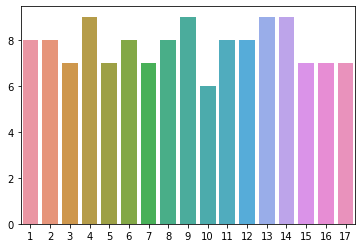

In [120]:
sns.barplot(x=list(range(1,18)) , y=tpw)   ### Ugly bar plot!

In [122]:
pd.Series(tpw).value_counts()

8    6
7    6
9    4
6    1
dtype: int64

In [147]:
def FlexPerWeek(weeknumber):
    temp = nfl.loc[nfl.Week==weeknumber,]
    
    names = list(temp.Name)
    positions = list(temp.Pos)
    salaries = list(temp['FD salary'])
    projections = list(temp['FD points'])

    lu = best_lineup(names, positions, salaries, projections);
    
    positions = temp.loc[temp.Name.isin(lu),'Pos']
    if sum(positions=='WR')==4:
        return('WR')
    elif sum(positions=='RB')==3:
        return('RB')
    elif sum(positions=='TE')==2:
        return('TE')
    else:
        return("Error")
        
    
    

In [130]:
FlexPerWeek(1)

Flexes = []
for i in range(1,18):
    k = FlexPerWeek(i)
    print("week:", i, " Flex Position:", k )
    Flexes.append(k)


[0, 155, 159, 164, 168, 313, 405, 44, 52]
              names position  salary  projection
0     Murray, Kyler       QB  8400.0       34.56
1     Cooper, Amari       WR  6600.0       32.40
2      Hill, Tyreek       WR  8500.0       31.60
3     Samuel, Deebo       WR  6300.0       27.40
4     Thielen, Adam       WR  7300.0       25.70
5   Gronkowski, Rob       TE  5200.0       25.00
6           Arizona      Def  3400.0       16.00
7        Mixon, Joe       RB  7200.0       23.00
8  Williams, Jamaal       RB  4900.0       21.00
[0, 155, 159, 164, 168, 313, 405, 44, 52]
              names position  salary  projection
0     Murray, Kyler       QB  8400.0       34.56
1     Cooper, Amari       WR  6600.0       32.40
2      Hill, Tyreek       WR  8500.0       31.60
3     Samuel, Deebo       WR  6300.0       27.40
4     Thielen, Adam       WR  7300.0       25.70
5   Gronkowski, Rob       TE  5200.0       25.00
6           Arizona      Def  3400.0       16.00
7        Mixon, Joe       RB  7200

[0, 154, 159, 165, 319, 323, 40, 415, 45]
              names position  salary  projection
0    Huntley, Tyler       QB  6400.0        35.9
1      Kupp, Cooper       WR  9000.0        30.2
2      Hill, Tyreek       WR  8300.0        26.8
3    Cooks, Brandin       WR  6900.0        25.7
4     Kelce, Travis       TE  7500.0        36.1
5     Andrews, Mark       TE  7400.0        30.6
6     Johnson, Duke       RB  4500.0        25.2
7       New Orleans      Def  3500.0        18.0
8  Wilson Jr., Jeff       RB  5800.0        18.9
week: 15  Flex Position: TE
[0, 155, 160, 165, 315, 405, 42, 47, 53]
             names position  salary  projection
0      Burrow, Joe       QB  7100.0        38.1
1     Higgins, Tee       WR  6500.0        37.4
2   Adams, Davante       WR  8800.0        28.4
3      Brown, A.J.       WR  6800.0        26.0
4    Andrews, Mark       TE  8000.0        22.5
5            Miami      Def  4000.0        25.0
6  Jackson, Justin       RB  5400.0        30.2
7       Mixon, 

In [131]:
Flexes

['WR',
 'RB',
 'WR',
 'RB',
 'RB',
 'RB',
 'RB',
 'WR',
 'RB',
 'RB',
 'WR',
 'RB',
 'TE',
 'RB',
 'TE',
 'RB',
 'RB']

In [132]:
pd.Series(Flexes).value_counts()

RB    11
WR     4
TE     2
dtype: int64

<AxesSubplot:xlabel='FD salary', ylabel='FD points'>

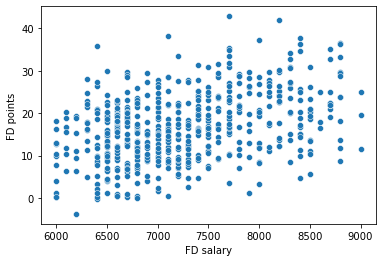

In [136]:
data = nfl.loc[nfl.Pos2.eq('QB1'),['FD salary', 'FD points' ]]

sns.scatterplot(x='FD salary', y='FD points', data=data )


<AxesSubplot:xlabel='FD salary', ylabel='FD points'>

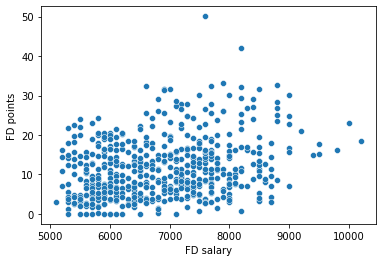

In [137]:
data = nfl.loc[nfl.Pos2.eq('WR1'),['FD salary', 'FD points' ]]

sns.scatterplot(x='FD salary', y='FD points', data=data )

<AxesSubplot:xlabel='FD salary', ylabel='FD points'>

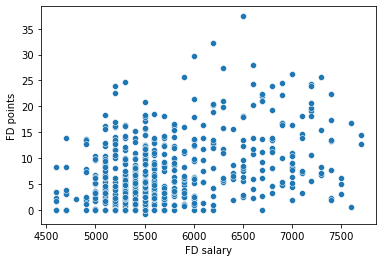

In [138]:
data = nfl.loc[nfl.Pos2.eq('WR2'),['FD salary', 'FD points' ]]

sns.scatterplot(x='FD salary', y='FD points', data=data )

<AxesSubplot:xlabel='FD salary', ylabel='FD points'>

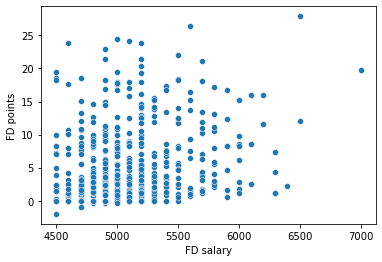

In [139]:
data = nfl.loc[nfl.Pos2.eq('WR3'),['FD salary', 'FD points' ]]

sns.scatterplot(x='FD salary', y='FD points', data=data )

In [140]:
nfl.loc[nfl.Pos2.eq('WR3') & nfl['FD salary'].eq(7000) ]

,index,Week,Year,GID,Name,Pos,Team,h/a,Oppt,FD points,...,Lagged Points MA3,Salary CMA,Lagged Points CMA,Lagged Oppt Points,Lagged Oppt Points CMA,Lagged Oppt Points MA3,Pos2,rank,Rank,TeamWeek
2349,2349,6,2021,3474,"Brown, Antonio",WR,tam,a,phi,19.8,...,13.3,6320.0,15.275,12.7,23.46,28.466667,WR3,3.0,3,tam6


In [141]:
nfl.loc[nfl.Week.eq(6) & nfl.Team.eq('tam')]

,index,Week,Year,GID,Name,Pos,Team,h/a,Oppt,FD points,...,Lagged Points MA3,Salary CMA,Lagged Points CMA,Lagged Oppt Points,Lagged Oppt Points CMA,Lagged Oppt Points MA3,Pos2,rank,Rank,TeamWeek
2215,2215,6,2021,1131,"Brady, Tom",QB,tam,a,phi,18.98,...,25.826667,8166.666667,27.256,9.08,17.768,20.640000,QB1,1.0,1,tam6
2239,2239,6,2021,5534,"Fournette, Leonard",RB,tam,a,phi,27.70,...,13.066667,6166.666667,11.440,17.20,23.920,27.000000,RB1,1.0,1,tam6
2240,2240,6,2021,5617,"Jones, Ronald",RB,tam,a,phi,3.40,...,4.566667,5333.333333,3.440,17.20,23.920,27.000000,RB2,2.0,2,tam6
2241,2241,6,2021,2889,"Bernard, Giovani",RB,tam,a,phi,1.40,...,9.566667,4720.000000,7.725,17.20,23.920,27.000000,RB3,3.0,3,tam6
2242,2242,6,2021,5823,"Vaughn, Ke'Shawn",RB,tam,a,phi,0.00,...,NaN,4500.000000,0.000,17.20,23.920,27.000000,RB4,4.0,4,tam6
2349,2349,6,2021,3474,"Brown, Antonio",WR,tam,a,phi,19.80,...,13.300000,6320.000000,15.275,12.70,23.460,28.466667,WR3,3.0,3,tam6
2350,2350,6,2021,5579,"Godwin, Chris",WR,tam,a,phi,6.80,...,11.366667,7483.333333,13.460,12.70,23.460,28.466667,WR2,2.0,2,tam6
2351,2351,6,2021,5253,"Evans, Mike",WR,tam,a,phi,3.70,...,17.300000,7166.666667,15.560,12.70,23.460,28.466667,WR1,1.0,1,tam6
2352,2352,6,2021,5600,"Mickens, Jaydon",WR,tam,a,phi,0.00,...,0.000000,4500.000000,0.000,12.70,23.460,28.466667,WR5,5.0,5,tam6
2353,2353,6,2021,5846,"Johnson, Tyler",WR,tam,a,phi,0.00,...,4.500000,4650.000000,2.900,12.70,23.460,28.466667,WR4,4.0,4,tam6


<AxesSubplot:xlabel='FD salary', ylabel='FD points'>

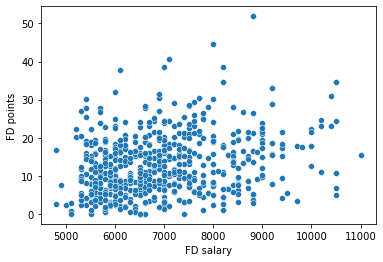

In [142]:
data = nfl.loc[nfl.Pos2.eq('RB1'),['FD salary', 'FD points' ]]

sns.scatterplot(x='FD salary', y='FD points', data=data )

<AxesSubplot:xlabel='FD salary', ylabel='FD points'>

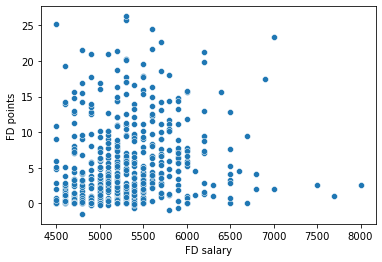

In [143]:
data = nfl.loc[nfl.Pos2.eq('RB2'),['FD salary', 'FD points' ]]

sns.scatterplot(x='FD salary', y='FD points', data=data )

In [144]:
nfl.loc[nfl.Pos2.eq('RB2') & nfl['FD salary'].eq(8000) ]

,index,Week,Year,GID,Name,Pos,Team,h/a,Oppt,FD points,...,Lagged Points MA3,Salary CMA,Lagged Points CMA,Lagged Oppt Points,Lagged Oppt Points CMA,Lagged Oppt Points MA3,Pos2,rank,Rank,TeamWeek
4173,4173,11,2021,5746,"Johnson, D'Ernest",RB,cle,h,det,2.6,...,10.066667,5309.090909,5.63,17.1,26.888889,21.266667,RB2,2.0,2,cle11


In [146]:
nfl.loc[nfl.Week.eq(11) & nfl.Team.eq('cle'), ['Week','Name','Pos','Pos2','Team','FD points','FD salary']]

,Week,Name,Pos,Pos2,Team,FD points,FD salary
4148,11,"Mayfield, Baker",QB,QB1,cle,9.94,6800.0
4172,11,"Chubb, Nick",RB,RB1,cle,21.40,9000.0
4173,11,"Johnson, D'Ernest",RB,RB2,cle,2.60,8000.0
4174,11,"Felton, Demetric",RB,RB3,cle,0.20,4800.0
4175,11,"Janovich, Andy",RB,RB4,cle,0.00,4500.0
4346,11,"Landry, Jarvis",WR,WR1,cle,12.20,6300.0
4347,11,"Bradley, Ja'Marcus",WR,WR3,cle,5.60,4700.0
4348,11,"Higgins, Rashard",WR,WR2,cle,2.20,5000.0
4349,11,"Cager, Lawrence",WR,WR4,cle,0.00,4500.0
4462,11,"Hooper, Austin",TE,TE1,cle,7.30,5300.0
